In [1]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/scripts/Mixture + Analytes/3 Analytes/')

from utils import add_noise, plot_lda_decision_boundary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re

import warnings
warnings.filterwarnings('ignore')
os.chdir('/home/soham/Desktop/GitHub/BTP/')

In [2]:
exponential_data = pd.read_csv('data/exponential/Exponential_labelled.csv')
exponential_data.head()

,CFU/mL,Sensor1,Sensor2,Sensor3,Label
0,3.044649e+07,-68.073957,70.693899,52.431326,1
1,3.039298e+07,-68.127914,70.653797,52.392651,1
2,3.033947e+07,-68.181871,70.613696,52.353977,1
3,3.028596e+07,-68.235828,70.573595,52.315302,1
4,3.023246e+07,-68.289786,70.533493,52.276628,1


In [3]:
smote_data = pd.read_csv('data/smote/labelled.csv')
smote_data.head()

,CFU/mL,Sensor2,Sensor1,Sensor3,label
0,30500000.0,70.734,-68.02,52.47,1
1,3050000.0,50.162,-95.70,32.63,1
2,305000.0,-8.390,-99.96,-10.41,1
3,30500.0,-18.700,-107.42,-23.93,1
4,3050.0,-19.620,-109.94,-27.24,1


In [4]:
linear_data = pd.read_csv('data/linearsampled/labelled.csv')
linear_data.head()

,CFU/mL,Sensor2,Sensor1,Sensor3,label
0,1.000000,-65.500000,-183.780000,-68.340000,1
1,1.000000,-50.570000,-150.230000,-64.370000,1
2,4.483297,-42.707326,-136.796593,-59.457419,1
3,4.824629,-41.823038,-137.741151,-58.657162,1
4,4.867012,-41.951291,-141.148828,-59.264776,1


## Exponential Data

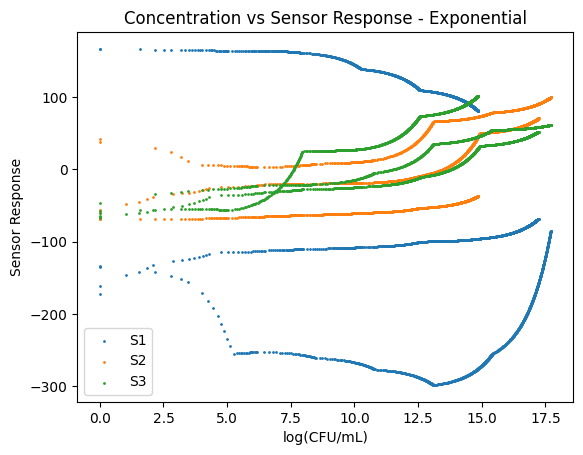

In [5]:
plt.scatter(np.log(exponential_data['CFU/mL']), exponential_data['Sensor1'], label='S1', s=1)
plt.scatter(np.log(exponential_data['CFU/mL']), exponential_data['Sensor2'], label='S2', s=1)
plt.scatter(np.log(exponential_data['CFU/mL']), exponential_data['Sensor3'], label='S3', s=1)
plt.xlabel('log(CFU/mL)')
plt.ylabel('Sensor Response')
plt.legend()
plt.title('Concentration vs Sensor Response - Exponential')
plt.show()

## Linear Interpolation

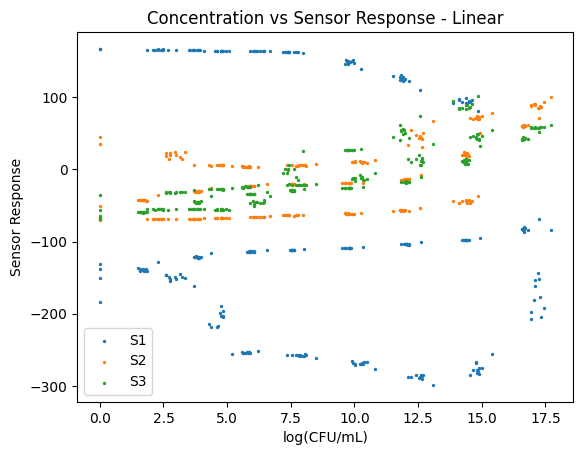

In [6]:
plt.scatter(np.log(linear_data['CFU/mL']), linear_data['Sensor1'], label='S1', s=2)
plt.scatter(np.log(linear_data['CFU/mL']), linear_data['Sensor2'], label='S2', s=2)
plt.scatter(np.log(linear_data['CFU/mL']), linear_data['Sensor3'], label='S3', s=2)
plt.xlabel('log(CFU/mL)')
plt.ylabel('Sensor Response')
plt.legend()
plt.title('Concentration vs Sensor Response - Linear')
plt.show()

## SMOTE 

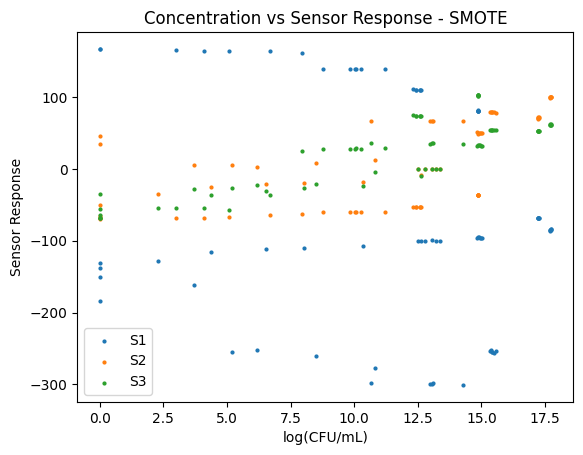

In [7]:
plt.scatter(np.log(smote_data['CFU/mL']), smote_data['Sensor1'], label='S1', s=4)
plt.scatter(np.log(smote_data['CFU/mL']), smote_data['Sensor2'], label='S2', s=4)
plt.scatter(np.log(smote_data['CFU/mL']), smote_data['Sensor3'], label='S3', s=4)
plt.xlabel('log(CFU/mL)')
plt.ylabel('Sensor Response')
plt.legend()
plt.title('Concentration vs Sensor Response - SMOTE')
plt.show()